## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import log as ln

## Constants/Typical values

In [2]:
# Natural constants
g = 9.81 # [m/s^2] Gravitational acceleration
G = 6.67430e-11 # Gravitational constant [m^3/kg s^2]
kb = 1.380649e-23 # Boltzmann constant [J/K]
u = 1.660539066e-27 # Atomic mass unit (Dalton) [kg]

# Common height
hk = 100 # [km] Karman Line
hu = 80 # [km] Space definition US Airforce
hleo = 200 # [km] Lowest LEO Orbit (200 - 2000 km)
hpark = 150 # [km] Lowest parking orbit (150 - 200 km)

# Atmospheric values
rho0 = 1.2 # [kg/m^3] Air density at 0 meter 20°C

# Cosmic speeds
vesc1 = 7800 # [m/s] First escape velocity in 180 km

#Exhaust speed various engines examples
vrl10 = 4565 # [m/s] RL10 Aerojet Rocketdyne (H2/LOX), Centaur upper stage of the Atlas V and the DCSS of the Delta IV.

# Rocket Science

## Rocket Mass Ratio R

$R=\frac{\text{Rocket fully loaded}}{\text{Empty rocket}}=\frac{m_{0}}{m}$

Source: Rocket Manual for Amateurs by Bertrand R Brinley Page 134

In [18]:
mp = 9 # Propellant mass
m0 = 12 # [kg] Initial weight
m = 1 # [kg} Dry mass, cutoff weight, burnout
vg = vrl10 # [m/s] Propellant speed/exhaust speed or specific impulse in m/s

In [19]:
R = m0/m # [kg]
R

12.0

## Rocket Efficiency (from Mass Ratio)

$\frac{E_{Rocket}}{E} = \frac{ln^2R}{ln^2R+(R-1)}$<br>

R: Mass Ratio<br>

Derivation: We assume that an Energy E is needed to divide the propellant mp from the rocket dry mass m.

Final Rocket energy after burnout<br>
[1]: $E_{Rocket}=\frac{1}{2}mV^2$

Compare impulse rocket with impulse propellant (vg is propellant speed)<br>
$V=-\frac{m_{p}}{m}v_{g}$

Into 1:<br>
$E_{Rocket}=\frac{1}{2}\frac{m_{p}^2v_{g}^2}{m}$<br>

Divided with the energy form the propellant E=1/2mp vg^2 and use the mass ratio R=(mp+m)/m<br>
$\frac{E_{Rocket}}{E}=\frac{R-1}{R}$

Because we can not speed up instantly we integrate like we did with the rocket equation and receive:<br>
$\frac{E_{Rocket}}{E} = \frac{ln^2R}{ln^2R+(R-1)}$<br>
$(ln^2X=ln(X)^2)$

<a>Source: https://de.wikipedia.org/wiki/Raketentriebwerk </a>


In [20]:
Eff = ((ln(R))**2)/(ln(R)**2+(R-1))*100
print(Eff.round(2))

35.95


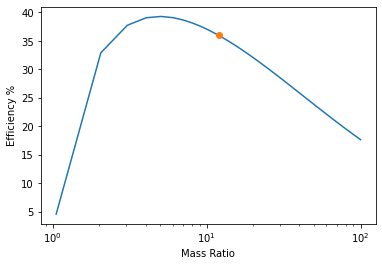

In [21]:
#As a plot we can see the the maxium is at mass ratio 5
x = np.linspace(1.05,100,100) # 100 linearly spaced numbers
y = ((ln(x))**2)/(ln(x)**2+(x-1)) * 100

# Plot
plt.ylabel('Efficiency %')
plt.xlabel('Mass Ratio')
plt.xscale('log')
plt.plot(x,y)
plt.plot(R,Eff, marker = 'o')
plt.show()

## Specific Impulse Isp

$I_{sp_{si}}=v_{g} =\frac{\dot{p}}{\dot{m}}=\frac{F}{\dot{m}} $[m/s]<br>
$v_{g}=g I_{sp}$[m/s]

For Vacuum only because in the Atmosphere the exhaust velocity is reduced by the surrounding pressure. Rocket nozzles have only one ideal pressure setup.

g: Gravitational acceleration on Earth<br>


In [22]:
Isp = vg/g # [s]
Isp

465.34148827726807

## Rocket Equation

$\Delta v=v_{g}ln\frac{m_{0}}{m}$

delta v: Maximum speed change<br>
vg: Propellant speed<br>
m0: Initial mass (Rocket + propellant)<br>
m: Rocket mass/after burnout

In [23]:
vend=vg*ln(R) # [m/s]
print(vend.round(2))

11343.6


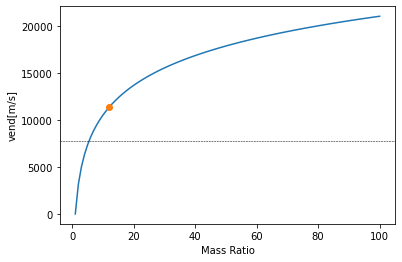

In [24]:
#As a plot we can see that above mass ratio of e (2,7) the final speed can be bigger than the initial one
x = np.linspace(1,100,100) # 100 linearly spaced numbers
y = vg*ln(x)

# Plot
plt.ylabel('vend[m/s]')
plt.xlabel('Mass Ratio')
plt.plot(x,y)
plt.plot(R,vend, marker = 'o')
plt.axhline(y=vesc1, color='black', linewidth=0.5, linestyle='--')
plt.show()

For a multi stage rocket the delta v adds up for each stage

For example a two stage rocket with the same vg for all stages and 90% fuel would have:

$\Delta v=3,3v_{g}$

A single stage rocket with the same fuel an dry mass:

$\Delta v=2,2v_{g}$

So the two stage rocket is about 1,5 times more efficent

## Max Q

Max Q is the time and position a rocket expires the maximum dynamic pressure. It’s a combination of high speed and high air density. Tt can be described with the dynamic pressure (Staudruck)

$p=\frac{\rho}{2}v^2$

rho = Air density<br>
v = Rocket speed


In [25]:
# Example for our rocket

rho = rho0 # [kg/m^3]
v = 2000 # [m/s]

maxQ = rho/2*v # [Pa][N/m^2]
maxQ

1200.0

# Rocket Engines
## Liquid Fuels

The Thermal velocity vth of a gas in three dimensions is described as:

$v_{th}=\sqrt{\frac{3k_{bT}}{m}}$

kb: Boltzmann constant<br>
m: Molecule Mass<br>
T: Temperature<br>

It is directly proportional to the specific impulse so:

$I_{sp}=\frac{v_{th}}{g}$


In [26]:
#Example hydrogen

T = 300 # Temperature of the gas [K]
mu = 2 # Mass unit of the molecule (For H2 take H mass double)

vth=np.sqrt((3*kb*T)/(mu*u)) # [m/s]
print(vth.round(2))

1934.3



# Orbital Mechanics
## Gravitation

$F_{g}=G\frac{m_{1}m_{2}}{r^2}$

<img src='gravity.png' width="200" height="200">

The acceleration between two object is with F=ma:<br>
$a_{1}=\frac{F_{1}}{m_{1}}=G\frac{m_{2}}{r^2}$

## First cosmic speed/Orbit Speed

We compare the centripetal force of an object with speed v with the gravitational acceleration (In free Fall there is only gravity force)<br>
$\frac{v^2}{r}=\frac{GM}{r^2}$

Solved by v we receive<br>
$v=\sqrt{\frac{GM}{r}}$

G: Gravitational constant<br>
M: Planets Mass<br>
r: Radius from planets core

In [27]:
#Example for Earth
h = 180000 # Height from surface
M = 5.9722e+24 # Mass earth [kg]
re = 6371e3 # Earth radius [m]

cs = np.sqrt(M*G/(h+re)) # [m/s]
print(cs.round(2))

7800.39
